- Ok so this specific order of imports cannot be changed or else you get some bizarre error  
- If an error pops up when importing try restarting the kernel

In [1]:
import numpy as np
import sys
import pandas as pd
import pickle

from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering


from preprocess import *
from utilities import *
from constants import *
from supervised_sentiment_analysis import *
from skip_thought_vectors import *
from graphing import *



[nltk_data] Downloading package wordnet to
[nltk_data]     /yw_data/robert_gold/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/yw_data/robert_gold/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/yw_data/robert_gold/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/yw_data/robert_gold/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.


INFO:tensorflow:Reading vocabulary from skip-thoughts/skip_thoughts/pretrained/skip_thoughts_uni_2017_02_02/vocab.txt

INFO:tensorflow:Loaded vocabulary with 930914 words.
INFO:tensorflow:Loading embedding matrix from skip-thoughts/skip_thoughts/pretrained/skip_thoughts_uni_2017_02_02/embeddings.npy
INFO:tensorflow:Loaded embedding matrix with shape (930914, 620)
INFO:tensorflow:Building model.
Instructions for updating:
Queue-based input pipelines have been replaced by `tf.data`. Use `tf.data.TFRecordDataset`.


Instructions for updating:
Use `tf.cast` instead.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, wh

- Encode preprocessed answers as thought vectors, and add them as a column to merged_results
- Some (two, specifically) of the entries are encoded as nan uniformly for some reason, these are filtered out by vectorized_results

In [2]:
merged_results = pickle.load(open('merged_results.pickle', 'rb'))
merged_results['Valid Vector'] = merged_results['Skip Thought Vector'].apply(lambda x: ~np.isnan(x).any())
removed_results = merged_results[~merged_results['Valid Vector']]
merged_results = merged_results[merged_results['Valid Vector']]

In [3]:
merged_results['Categorical Tag'].unique()

array(['no tag', 'negative', 'positive', 'neutral'], dtype=object)

In [4]:
[print(f"{len(answer.split())} \n{answer}") for answer in removed_results['Answer']]
# Model really doesn't like long responses for some reason

229 
i will simply reiterate what i mention in the comment for that exercise i be take csc from harvard concurrently with this class also through ed and i be amazed how empower their problem set feel compare to these in this course i spend as much or more time fight with the grader limitation as i do cod the solution i understand that figure out bug be also a big component of the job of a programmer but as a student it be very difficult to both debug my work and debug the grader weird be by comparison the problem set of the csc course be structure so that i can solve interesting realistic coding problem that i might face in the wild and i be grade on my ability to write code that generate the expected outcome for that problem the test they do on my code do not care how i get to the solution only that i get there and handle whatever edge case they throw at it this test my mastery of the core concept of the week lecture rather than test my ability to predict how my instructor might solve

[None, None]

In [5]:
get_nn('i wrote pseudocode', merged_results)

Sentence:
 i wrote pseudocode

Nearest neighbors:
1. pythontutor, 37.8284448083474
2. pseudocode, 37.8284448083474
3. pseudocode, 37.8284448083474
4. i wrote down the input and outputs, 39.810830260515104
5. I used Spyder, 40.24962305304314
6. Reading the psudocodes, 40.96088735214323
7. I solved it., 41.3789086401747
8. i solved it, 41.3789086401747
9. I have a lot of prior knowledge so i just wrote it., 41.50629456976492
10. writing down, 41.69564198717728


In [6]:
N_CLUSTERS = 20

In [7]:
labeled_results = merged_results[merged_results['Categorical Tag'] != 'no tag']
q1_labeled_results = labeled_results[labeled_results['Question'] == Q1]
q1_features = np.array(q1_labeled_results['Skip Thought Vector'].tolist())
q1_labels = np.array(q1_labeled_results['Categorical Tag'])
q1_labeled_results[q1_labeled_results['Categorical Tag'] == 'negative'].shape

(99, 18)

Confusion matrix, without normalization
[[24  1  4]
 [ 7 72  6]
 [ 4  1 31]]
Normalized confusion matrix
[[0.82758621 0.03448276 0.13793103]
 [0.08235294 0.84705882 0.07058824]
 [0.11111111 0.02777778 0.86111111]]


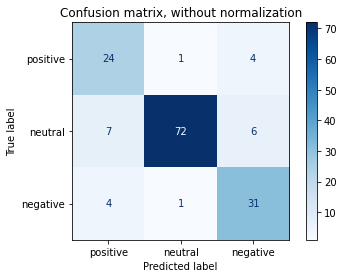

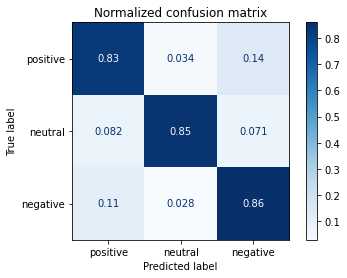

array([[31,  1,  4],
       [ 6, 72,  7],
       [ 4,  1, 24]])

In [8]:
plot_model_confusion_matrix(q1_features, q1_labels, model = 'rfc')

Confusion matrix, without normalization
[[30  0  4]
 [ 4 77  2]
 [ 3  4 26]]
Normalized confusion matrix
[[0.88235294 0.         0.11764706]
 [0.04819277 0.92771084 0.02409639]
 [0.09090909 0.12121212 0.78787879]]


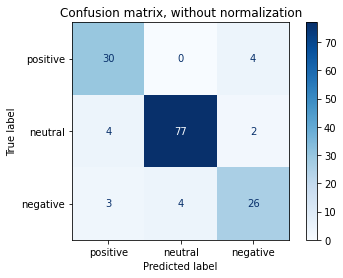

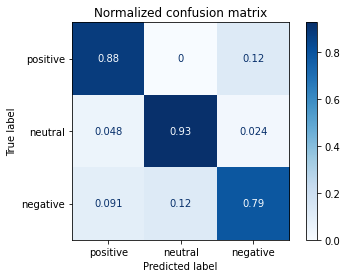

array([[26,  4,  3],
       [ 2, 77,  4],
       [ 4,  0, 30]])

In [9]:
plot_model_confusion_matrix(q1_features, q1_labels, model = 'svc')

In [10]:
TRIALS = 1
SPLITS = 100

In [11]:
features = np.array(q1_labeled_results['Skip Thought Vector'].tolist())
labels = np.array(q1_labeled_results['Categorical Tag'])

conf_matrices = get_conf_matrices(features, labels, clfs = ['svc', 'gnb', 'rfc'], trials = TRIALS, splits = SPLITS, test_size = 0.3)

10 trials done out of 100
20 trials done out of 100
30 trials done out of 100
40 trials done out of 100
50 trials done out of 100
60 trials done out of 100
70 trials done out of 100
80 trials done out of 100
90 trials done out of 100
100 trials done out of 100


[[26.52  1.98  6.02]
 [ 3.38 76.91  5.13]
 [ 5.17  0.23 24.66]]
AxesSubplot(0.125,0.125;0.775x0.755)


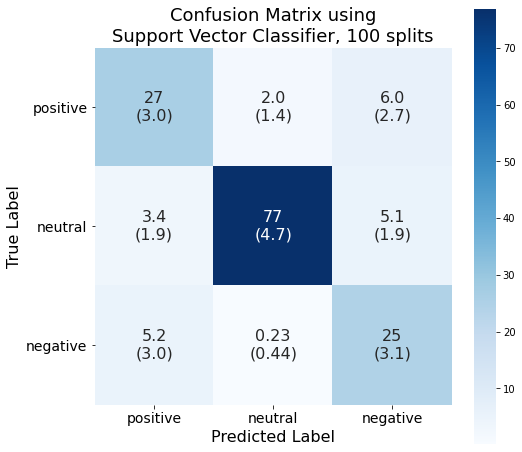

In [12]:
def get_average_heatmaps(confusion_matrices, normalize = True, trials = 1, splits = 10, figsize = (8,8)):
    average_confusion_matrices = copy.deepcopy(confusion_matrices)
    clf_names = {
        'svc': 'Support Vector Classifier',
        'gnb': 'Gaussian Naive Bayes',
        'rfc': 'Random Forest Classifier'
    }
    l = len(confusion_matrices)
    fig, axs = plt.subplots(l, squeeze=False, figsize = (figsize[0],figsize[1] * l), gridspec_kw={'hspace': 0.2, 'wspace': 0})
    pos = 0
    
    for clf, matrices in average_confusion_matrices.items():
        average_confusion_matrix = sum(matrices)/len(matrices)
        print(average_confusion_matrix)
        stdev_matrix = np.std(matrices, axis=0)
        figs = 2
        def round_int(string):
            return string[:figs] if '.' not in string[:figs] else string[:figs+1]
        vfunc = np.vectorize(round_int)
        def signif(x, p):
            x = np.asarray(x)
            x_positive = np.where(np.isfinite(x) & (x != 0), np.abs(x), 10**(p-1))
            mags = 10 ** (p - 1 - np.floor(np.log10(x_positive)))
            rounded = np.round(x * mags) / mags
            vfunc = np.vectorize(lambda x: x[:-2] if len(x) == p+2 and x[-2:] == '.0' else x)
            return vfunc(rounded.astype(str))
        
    
        str_mean_matrix = signif(average_confusion_matrix, figs).astype(str)
        str_stdev_matrix = signif(stdev_matrix, figs).astype(str)
        annot_array = np.core.defchararray.add(str_mean_matrix, '\n(')
        annot_array = np.core.defchararray.add(annot_array, str_stdev_matrix)
        annot_array = np.core.defchararray.add(annot_array, ')')
        if normalize:
            average_confusion_matrix = normalized(average_confusion_matrix, axis = 1, order = 1)
        vmin = 0 if normalize else None
        vmax = 1 if normalize else None
        ax = axs[pos,0]
        print(ax)
        pos+=1
        sns.heatmap(average_confusion_matrix, cmap=plt.cm.Blues, ax = ax, 
                    vmin = vmin, vmax = vmax, 
                    square = True, annot = annot_array, 
                    xticklabels = CLASS_NAMES, yticklabels = CLASS_NAMES, fmt = '',
                    annot_kws={"fontsize":16})
        ax.set_yticklabels(rotation = 0, size = 14, labels = CLASS_NAMES)
        ax.set_xticklabels(size = 14, labels = CLASS_NAMES)
        trial_string = '' if trials == 1 else str(trials)+" trials, "
        normalized_string = 'Normalized ' if normalize else ''
        title = f"{normalized_string}Confusion Matrix using\n{clf_names[clf]}, {trial_string}{str(splits)} splits"
        ax.set_title(title, size = 18)
        ax.set_xlabel('Predicted Label', size = 16)
        ax.set_ylabel('True Label', size = 16)

svc_dict = {'svc': conf_matrices['svc']}
get_average_heatmaps(svc_dict, trials = TRIALS, splits = SPLITS, normalize = False, figsize = (8,8))

In [13]:
cv_count = 10
get_cross_validation_scores(features, labels, svm.SVC(), cv_count = cv_count)
get_cross_validation_scores(features, labels, RandomForestClassifier(), cv_count = cv_count)
get_cross_validation_scores(features, labels, GaussianNB(), cv_count = cv_count)

Accuracy: 0.87 (+/- 0.09)
Accuracy: 0.85 (+/- 0.06)
Accuracy: 0.78 (+/- 0.12)


array([0.76, 0.76, 0.82, 0.88, 0.76, 0.78, 0.66, 0.74, 0.8 , 0.86])

In [15]:
svc = svm.SVC()
rfc = RandomForestClassifier()
gnb = GaussianNB()
for clf in [svc, rfc, gnb]:
    arr = np.array(get_kappa(features, labels, clf, trials = SPLITS))
    print(arr.mean(), arr.std())

0.7519883722946392 0.04343499203742161
0.7324196041166158 0.04795444424288068
0.646506944188402 0.04548787411548113


In [16]:
for clf, conf_matrix in conf_matrices.items():
    macro_F_scores = []
    print(clf)
    for conf_matrix in conf_matrix:
        macro_F_scores.append(macro_F(conf_matrix))
    print((np.mean(macro_F_scores), np.std(macro_F_scores)))

svc
(0.8149036707938668, 0.03262997853193372)
gnb
(0.7528877685190115, 0.033728650832041435)
rfc
(0.7922302294396608, 0.03422286656782331)
